In [2]:
import pandas as pd
from ggplot import *
import json
%matplotlib inline

In [3]:
rawdata = pd.read_csv("Resources_Pesticides_Use_E_All_Data.csv")[["Country", "Year", "Item", "Value"]]
cleandata = rawdata.fillna(0).groupby(["Country", "Item", "Year"], as_index=0).sum().sort_values(by="Country")

In [13]:
def fdrec(df):
    drec = dict()
    ncols = df.values.shape[1]
    for line in df.values:
        d = drec
        for j, col in enumerate(line[:-1]):
            if not col in d.keys():
                if j != ncols-2:
                    d[col] = {}
                    d = d[col]
                else:
                    d[col] = line[-1]
            else:
                if j!= ncols-2:
                    d = d[col]
    return drec
with open("pesticide.json", "w") as datafile:
    datadict = fdrec(cleandata)
    json.dump(datadict, datafile, ensure_ascii=False)

In [14]:
#Pesticide Plot (All)
chemsperyear = rawdata.fillna(0).groupby(["Item", "Year"], as_index=0)["Value"].sum()
#ggplot(aes(x="Year", y="Value", color="Item"), data=chemsperyear)+geom_line()
with open("chemsperyear.json", "w") as datafile:
    datadict = fdrec(chemsperyear)
    json.dump(datadict, datafile, ensure_ascii=False)

In [32]:
#DDT
ddtraw = rawdata.loc[rawdata["Item"]=="Chlorinated Hydrocarbons"]
ddtbyyear = ddtraw.groupby(["Year", "Country"], as_index=0)["Value"].sum()
#ggplot(aes(x="Year", y="Value", color="Country"), data=ddtbyyear.)+geom_line()

In [41]:
ddtbycountry = ddtraw.groupby("Country", as_index=0)["Value"].sum().sort_values(by="Value", ascending=0)
top10 = ddtbycountry.iloc[1:10, 0]
top10

83            Turkey
72      South Africa
58          Pakistan
80          Thailand
21           Ecuador
27            France
9             Canada
85    United Kingdom
15        Costa Rica
Name: Country, dtype: object

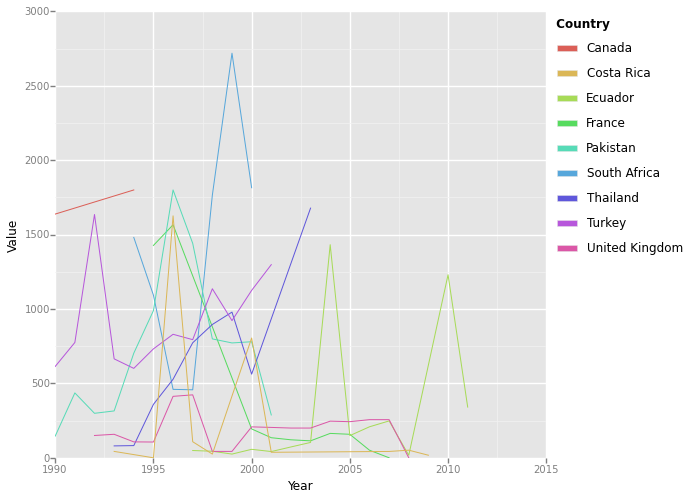

<ggplot: (8780649974837)>

In [46]:
selectddtbyyear = ddtbyyear.ix[ddtbyyear["Country"].isin(top10), :]
ggplot(aes(x="Year", y="Value", color="Country"), data=selectddtbyyear)+geom_line()